In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('C:/Users/luisf/OneDrive/Escritorio/BOOTCAMP ESPOL/Marketing/data_ecu.txt', delim_whitespace=True)


C:\Users\luisf\AppData\Local\Temp\ipykernel_15392\1580032600.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('C:/Users/luisf/OneDrive/Escritorio/BOOTCAMP ESPOL/Marketing/data_ecu.txt', delim_whitespace=True)


**LIMPIEZA DE DATA**

In [22]:
data.describe()

,Longitude,Latitude
count,305,290
unique,298,288
top,error,"999,0"
freq,3,3


In [21]:
data.isnull().sum()


Longitude     0
Latitude     15
dtype: int64

In [24]:
data.duplicated().sum()

7

In [20]:
data.value_counts()

Longitude           Latitude           
error               999,0                  3
-78.39704089477075  -0,0578544460543432    1
-79.96131215663695  -2,1566645077691304    1
-79.95605510707483  -2,123089855495745     1
-79.95491044967635  -2,226476845818889     1
                                          ..
-78.59815593129615  -0,1680620461632256    1
-78.59610323995663  -0,048269125163402     1
-78.59601916322502  0,0001952379649915     1
-78.59587541748397  -0,0659677990582848    1
-79.89957184928626  -2,201976100926877     1
Name: count, Length: 288, dtype: int64

In [28]:
data_clean = data.dropna()

In [29]:
data_clean= data_clean.drop_duplicates()

In [30]:
data_clean.isnull().sum()

Longitude    0
Latitude     0
dtype: int64

In [32]:
data_clean.duplicated().sum()

0

In [33]:
data_clean.describe()

,Longitude,Latitude
count,288,288
unique,288,288
top,-80.43876447751417,"-0,9519244059855368"
freq,1,1


In [34]:
data_clean.value_counts()

Longitude           Latitude           
-78.37750375216743  -0,0766595688983383    1
-78.39704089477075  -0,0578544460543432    1
-79.96131215663695  -2,1566645077691304    1
-79.95605510707483  -2,123089855495745     1
-79.95491044967635  -2,226476845818889     1
                                          ..
-78.59815593129615  -0,1680620461632256    1
-78.59610323995663  -0,048269125163402     1
-78.59601916322502  0,0001952379649915     1
-78.59587541748397  -0,0659677990582848    1
error               999,0                  1
Name: count, Length: 288, dtype: int64

In [36]:
data_clean = data_clean[data_clean['Longitude'] != 'error']


In [39]:
data_clean.value_counts()

Longitude           Latitude           
-78.37750375216743  -0,0766595688983383    1
-79.94374388270353  -2,178066005532484     1
-79.95605510707483  -2,123089855495745     1
-79.95491044967635  -2,226476845818889     1
-79.95029717405482  -2,177631798374293     1
                                          ..
-78.59815593129615  -0,1680620461632256    1
-78.59610323995663  -0,048269125163402     1
-78.59601916322502  0,0001952379649915     1
-78.59587541748397  -0,0659677990582848    1
-80.51343212052747  -1,137741062882963     1
Name: count, Length: 287, dtype: int64

In [46]:
data_clean.columns = ['Longitude', 'Latitude']

In [47]:
data_clean['Longitude'] = data_clean['Longitude'].astype(float)
data_clean['Latitude'] = data_clean['Latitude'].astype(float)


In [49]:
print(data_clean.dtypes)


Longitude    float64
Latitude     float64
dtype: object


In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Elegimos 3 clusters
data_clean['cluster'] = kmeans.fit_predict(data_clean[['Longitude', 'Latitude']])

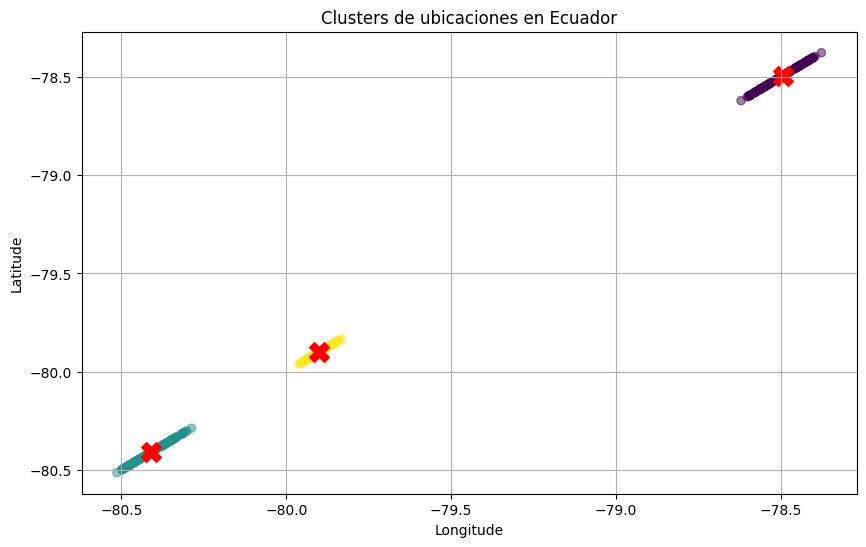

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Longitude'], data_clean['Latitude'], c=data_clean['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)  # Centroides
plt.title('Clusters de ubicaciones en Ecuador')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [53]:
#En mi caso data clean tiene 287 lineas no 305 por la limpieza de datos nulos, duplicados y data NO Numerica, que se realizo

if len(data_clean) == 287:
    # Crea un DataFrame con location_id y cluster_label
    clusters_output = pd.DataFrame({
        'location_id': range(len(data_clean)),
        'cluster_label': data_clean['cluster']
    })

    # Escribe el archivo de salida
    clusters_output.to_csv('clusters.txt', sep=' ', index=False, header=False)

    print("Archivo 'clusters.txt' generado exitosamente.")
else:
    print(f"El DataFrame no tiene 287 filas, tiene {len(data_clean)} filas.")




Archivo 'clusters.txt' generado exitosamente.
